In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
dataset_dir = "/content/drive/MyDrive/ucsd/2022/spring/cse291/COVID19 Sera Data/"

In [ ]:
dataset_df = pd.read_csv(dataset_dir + "covid19_sera_merged.csv")
dataset_df.head()

,maestro_column_unmod,maestro_column_variant,patient_id,label,y_covid,y_severe_type,is_train,Patient ID a,Metabolomics ID e,Metabolites,...,variant_ccms_row_101452,variant_ccms_row_101453,variant_ccms_row_101454,variant_ccms_row_101455,variant_ccms_row_101456,variant_ccms_row_101457,variant_ccms_row_101458,variant_ccms_row_101459,variant_ccms_row_101460,variant_ccms_row_101461
0,_dyn_#Healthy.HC1.Healthy..HC1.1_intensity_for...,_dyn_#Healthy.HC1.Healthy..HC1.1_intensity_for...,HC1,Healthy,0,0,1,HC1,jkdz1,jkdz1,...,0.0,1.958825,0.00000,0.000000,1.174198,0.0,0.0,0.0,0.370040,0.0
1,_dyn_#Healthy.HC10.Healthy..HC10.1_intensity_f...,_dyn_#Healthy.HC10.Healthy..HC10.1_intensity_f...,HC10,Healthy,0,0,0,HC10,jkdz10,jkdz10,...,0.0,2.544654,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
2,_dyn_#Healthy.HC12.Healthy..HC12.1_intensity_f...,_dyn_#Healthy.HC12.Healthy..HC12.1_intensity_f...,HC12,Healthy,0,0,0,HC12,jkdz12,jkdz12,...,0.0,0.913199,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
3,_dyn_#Healthy.HC13.Healthy..HC13.1_intensity_f...,_dyn_#Healthy.HC13.Healthy..HC13.1_intensity_f...,HC13,Healthy,0,0,1,HC13,jkdz13,jkdz13,...,0.0,1.035449,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
4,_dyn_#Healthy.HC17.Healthy..HC17.1_intensity_f...,_dyn_#Healthy.HC17.Healthy..HC17.1_intensity_f...,HC17,Healthy,0,0,1,HC17,jkdz17,jkdz17,...,0.0,0.110892,0.81455,0.863862,0.000000,0.0,0.0,0.0,0.791905,0.0


In [ ]:
dataset_df = dataset_df.fillna(0)

## Split train/validation/test set

In [ ]:
# from sklearn.model_selection import train_test_split

In [ ]:
# train_df, test_df = train_test_split(dataset_df, test_size=0.3, random_state=12345)
# val_df, test_df = train_test_split(test_df, test_size=0.5, random_state=54321)

In [ ]:
train_df = dataset_df.loc[dataset_df["is_train"] == 1, :]
test_df = dataset_df.loc[dataset_df["is_train"] == 0, :]

In [ ]:
print(train_df.shape)
# print(val_df.shape)
print(test_df.shape)

(66, 203873)
(17, 203873)


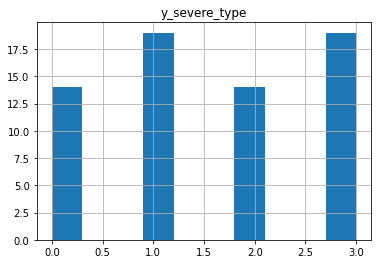

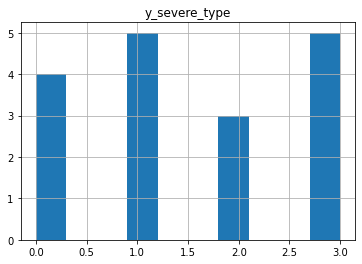

In [ ]:
train_df[["y_severe_type"]].hist()
# val_df[["y_severe_type"]].hist()
test_df[["y_severe_type"]].hist()
plt.show()

## Random forest and Gradient Boosting experiments

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, precision_score

In [ ]:
def get_variant_features(df):
  return df.iloc[:, 102412:]

In [ ]:
variant_train = get_variant_features(train_df)
# variant_val = get_variant_features(val_df)
variant_test = get_variant_features(test_df)

In [ ]:
variant_train.head()

,variant_ccms_row_1,variant_ccms_row_2,variant_ccms_row_3,variant_ccms_row_4,variant_ccms_row_5,variant_ccms_row_6,variant_ccms_row_7,variant_ccms_row_8,variant_ccms_row_9,variant_ccms_row_10,...,variant_ccms_row_101452,variant_ccms_row_101453,variant_ccms_row_101454,variant_ccms_row_101455,variant_ccms_row_101456,variant_ccms_row_101457,variant_ccms_row_101458,variant_ccms_row_101459,variant_ccms_row_101460,variant_ccms_row_101461
0,0.000000,0.0,0.935916,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.288821,...,0.0,1.958825,0.00000,0.000000,1.174198,0.0,0.0,0.0,0.370040,0.0
3,1.919552,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.028415,...,0.0,1.035449,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0
4,0.000000,0.0,0.286530,1.259306,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.110892,0.81455,0.863862,0.000000,0.0,0.0,0.0,0.791905,0.0
6,0.000000,0.0,0.987496,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.641419,...,0.0,0.325326,0.00000,0.000000,0.689717,0.0,0.0,0.0,0.420246,0.0
7,0.000000,0.0,0.220930,0.781082,0.272645,1.591362,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.22354,0.000000,0.000000,0.0,0.0,0.0,3.523790,0.0


In [ ]:
n_experiments = 10

In [ ]:
models = []

accs = []
pres = []

for i in range(n_experiments):
  print("Running experiment", i)
  rf_model = RandomForestClassifier(n_estimators=50, random_state=i)
  gb_model = GradientBoostingClassifier(n_estimators=50, random_state=i)
  lg_model = LGBMClassifier(n_estimators=50, random_state=i)

  acs = []
  prs = []
  for model in [rf_model, gb_model, lg_model]:
    labels = train_df["y_covid"]
    model.fit(variant_train, labels)
    train_preds = model.predict(variant_train)
    # val_preds = model.predict(variant_val)
    test_preds = model.predict(variant_test)

    acs.append((accuracy_score(labels, train_preds),
                #  accuracy_score(val_df["y_covid"], val_preds),
                 accuracy_score(test_df["y_covid"], test_preds)))
    prs.append((precision_score(labels, train_preds),
                #  precision_score(val_df["y_covid"], val_preds),
                 precision_score(test_df["y_covid"], test_preds)))
    models.append((rf_model, gb_model, lg_model))
    accs.append(acs)
    pres.append(prs)

Running experiment 0
Running experiment 1
Running experiment 2
Running experiment 3
Running experiment 4
Running experiment 5
Running experiment 6
Running experiment 7
Running experiment 8
Running experiment 9


In [ ]:
acc_avg = np.average(np.array(accs), axis=0)
acc_avg

array([[1.        , 0.92941176],
       [1.        , 0.88823529],
       [1.        , 0.94117647]])

In [ ]:
pre_avg = np.average(np.array(pres), axis=0)
pre_avg

array([[1.        , 0.9875    ],
       [1.        , 0.87638889],
       [1.        , 0.88888889]])

In [ ]:
pres

[[(1.0, 1.0), (1.0, 0.875), (1.0, 0.8888888888888888)],
 [(1.0, 1.0), (1.0, 0.875), (1.0, 0.8888888888888888)],
 [(1.0, 1.0), (1.0, 0.875), (1.0, 0.8888888888888888)],
 [(1.0, 1.0), (1.0, 0.875), (1.0, 0.8888888888888888)],
 [(1.0, 1.0), (1.0, 0.875), (1.0, 0.8888888888888888)],
 [(1.0, 1.0), (1.0, 0.875), (1.0, 0.8888888888888888)],
 [(1.0, 0.875), (1.0, 0.875), (1.0, 0.8888888888888888)],
 [(1.0, 0.875), (1.0, 0.875), (1.0, 0.8888888888888888)],
 [(1.0, 0.875), (1.0, 0.875), (1.0, 0.8888888888888888)],
 [(1.0, 1.0), (1.0, 0.875), (1.0, 0.8888888888888888)],
 [(1.0, 1.0), (1.0, 0.875), (1.0, 0.8888888888888888)],
 [(1.0, 1.0), (1.0, 0.875), (1.0, 0.8888888888888888)],
 [(1.0, 1.0), (1.0, 0.875), (1.0, 0.8888888888888888)],
 [(1.0, 1.0), (1.0, 0.875), (1.0, 0.8888888888888888)],
 [(1.0, 1.0), (1.0, 0.875), (1.0, 0.8888888888888888)],
 [(1.0, 1.0), (1.0, 0.875), (1.0, 0.8888888888888888)],
 [(1.0, 1.0), (1.0, 0.875), (1.0, 0.8888888888888888)],
 [(1.0, 1.0), (1.0, 0.875), (1.0, 0.888888

In [ ]:
sum(models[0][2].feature_importances_ != 0)

26

In [ ]:
x = 0
for i in range(n_experiments):
  x += sum(models[i][0].feature_importances_ != 0)
  print(sum(models[i][0].feature_importances_ != 0))
print("avg:", x / n_experiments)

304
304
304
317
317
317
311
311
311
315
avg: 311.1


In [ ]:
idxs = []
for i in range(n_experiments):
  for j,x in enumerate(models[i][2].feature_importances_):
    if x != 0:
      idxs.append((j, x))
idxs = set(idxs)
print(len(idxs))
idxs = sorted(idxs, key=lambda x: x[1], reverse=True)
idxs

26


[(70251, 8),
 (70223, 7),
 (70245, 7),
 (42796, 5),
 (10132, 4),
 (6743, 4),
 (72190, 4),
 (81335, 3),
 (57363, 3),
 (58282, 3),
 (81377, 2),
 (46199, 2),
 (60072, 2),
 (60815, 2),
 (67337, 1),
 (69788, 1),
 (43384, 1),
 (73516, 1),
 (9614, 1),
 (57099, 1),
 (89046, 1),
 (63817, 1),
 (96755, 1),
 (54895, 1),
 (53500, 1),
 (40057, 1)]

In [ ]:
idxs = np.array(idxs)
idxs

array([[70251,     8],
       [70223,     7],
       [70245,     7],
       [42796,     5],
       [10132,     4],
       [ 6743,     4],
       [72190,     4],
       [81335,     3],
       [57363,     3],
       [58282,     3],
       [81377,     2],
       [46199,     2],
       [60072,     2],
       [60815,     2],
       [67337,     1],
       [69788,     1],
       [43384,     1],
       [73516,     1],
       [ 9614,     1],
       [57099,     1],
       [89046,     1],
       [63817,     1],
       [96755,     1],
       [54895,     1],
       [53500,     1],
       [40057,     1]])

In [ ]:
important_df = dataset_df[["maestro_column_variant", "patient_id", "y_covid"] + list(variant_train.columns[idxs[:, 0]])]
important_df

,maestro_column_variant,patient_id,y_covid,variant_ccms_row_70252,variant_ccms_row_70224,variant_ccms_row_70246,variant_ccms_row_42797,variant_ccms_row_10133,variant_ccms_row_6744,variant_ccms_row_72191,...,variant_ccms_row_43385,variant_ccms_row_73517,variant_ccms_row_9615,variant_ccms_row_57100,variant_ccms_row_89047,variant_ccms_row_63818,variant_ccms_row_96756,variant_ccms_row_54896,variant_ccms_row_53501,variant_ccms_row_40058
0,_dyn_#Healthy.HC1.Healthy..HC1.1_intensity_for...,HC1,0,0.221872,1.524973,0.521797,2.287542,0.585327,0.000000,0.389748,...,0.070137,0.638102,0.135000,3.544477,0.000000,0.105644,0.143525,1.104631,0.283160,0.358924
1,_dyn_#Healthy.HC10.Healthy..HC10.1_intensity_f...,HC10,0,0.620541,0.765736,0.771675,3.168297,0.634097,0.868488,1.325422,...,0.115440,1.380685,0.337143,2.105151,0.194562,0.086221,0.497956,1.801040,0.057826,0.156217
2,_dyn_#Healthy.HC12.Healthy..HC12.1_intensity_f...,HC12,0,0.124841,0.909745,0.413016,0.274528,0.638015,0.418480,0.051639,...,0.056459,0.071696,0.181228,0.124468,0.098407,0.140286,0.087946,0.858310,0.049611,0.107903
3,_dyn_#Healthy.HC13.Healthy..HC13.1_intensity_f...,HC13,0,0.307739,0.364249,0.179029,0.353590,0.305801,1.115922,0.115356,...,0.076735,0.135240,0.191112,0.220319,0.123784,0.069492,0.116262,0.661240,0.045577,0.117254
4,_dyn_#Healthy.HC17.Healthy..HC17.1_intensity_f...,HC17,0,0.898199,1.944446,0.669398,0.627867,0.733261,0.624247,0.270939,...,0.205009,0.780187,0.141623,0.646114,0.332367,0.203421,0.000000,1.238651,0.626800,0.685249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,_dyn_#Symptomatic-non-COVID-19.JBDZ5.Symptomat...,JBDZ5,0,0.017284,7.067412,0.142291,0.171700,0.857866,0.371860,0.049932,...,0.051355,0.065978,0.845604,0.050432,0.100490,0.058056,0.079540,0.451365,0.628940,0.274478
79,_dyn_#Symptomatic-non-COVID-19.JBDZ6.Symptomat...,JBDZ6,0,0.011112,5.621560,0.096833,0.079235,1.680314,0.200864,0.053263,...,0.011872,0.085513,1.547744,0.047459,0.050922,0.241873,0.258377,0.330645,1.064563,0.588977
80,_dyn_#Symptomatic-non-COVID-19.JBDZ7.Symptomat...,JBDZ7,0,0.005851,5.262318,0.014645,0.748578,1.582022,0.000000,0.036659,...,0.054386,0.172897,0.243571,0.039268,0.183202,0.400589,0.036350,0.116908,0.036609,0.178160
81,_dyn_#Symptomatic-non-COVID-19.JBDZ8.Symptomat...,JBDZ8,0,0.023413,4.185061,0.086398,0.385558,0.690883,0.000000,0.014622,...,0.052263,0.150494,0.118828,0.044883,0.465654,0.072643,0.078978,0.244215,0.017419,0.135533


In [ ]:
important_df.to_csv(dataset_dir + "important_variant_peptides.tsv", sep="\t", index=False)